**In this notebook we are trying to perform some Eda to comprehend the relationship between the students' marks and the parents' background, test preparation... etc. After that we will try to predict whether some students passed the tests or not based on the data we have using K-Neighbors Classifier. **

[**The data we used**](https://www.kaggle.com/spscientist/students-performance-in-exams)
**represents marks secured by students in a high school in the United States.**

**The columns are the following:**
* **"gneder" : The gender of the student.**
* **"race/ethnicity" : The student's ethnicity.**
* **"parental level of education" : The parents' level of education.**
* **"lunch" : Tells if the student had lunch that day or not.**
* **"test preparation course" : Tells if the student had completed a course before the tests.**
* **"math score" : The student's math mark.**
* **"reading score" : The student's reading mark.**
* **"writing score" : The student's writing mark.**

# 1. **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

****

# 2. Importing the dataset

In [2]:
df = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print("The number of students who passed math is", df[df['math score']>=60]['math score'].count())

The number of students who passed math is 677


In [5]:
print("The number of students who passed reading", df[df['reading score']>=60]['reading score'].count())

The number of students who passed reading 746


In [6]:
print("The number of students who passed writing", df[df['writing score']>=60]['writing score'].count())

The number of students who passed writing 719


**Distribution of marks**

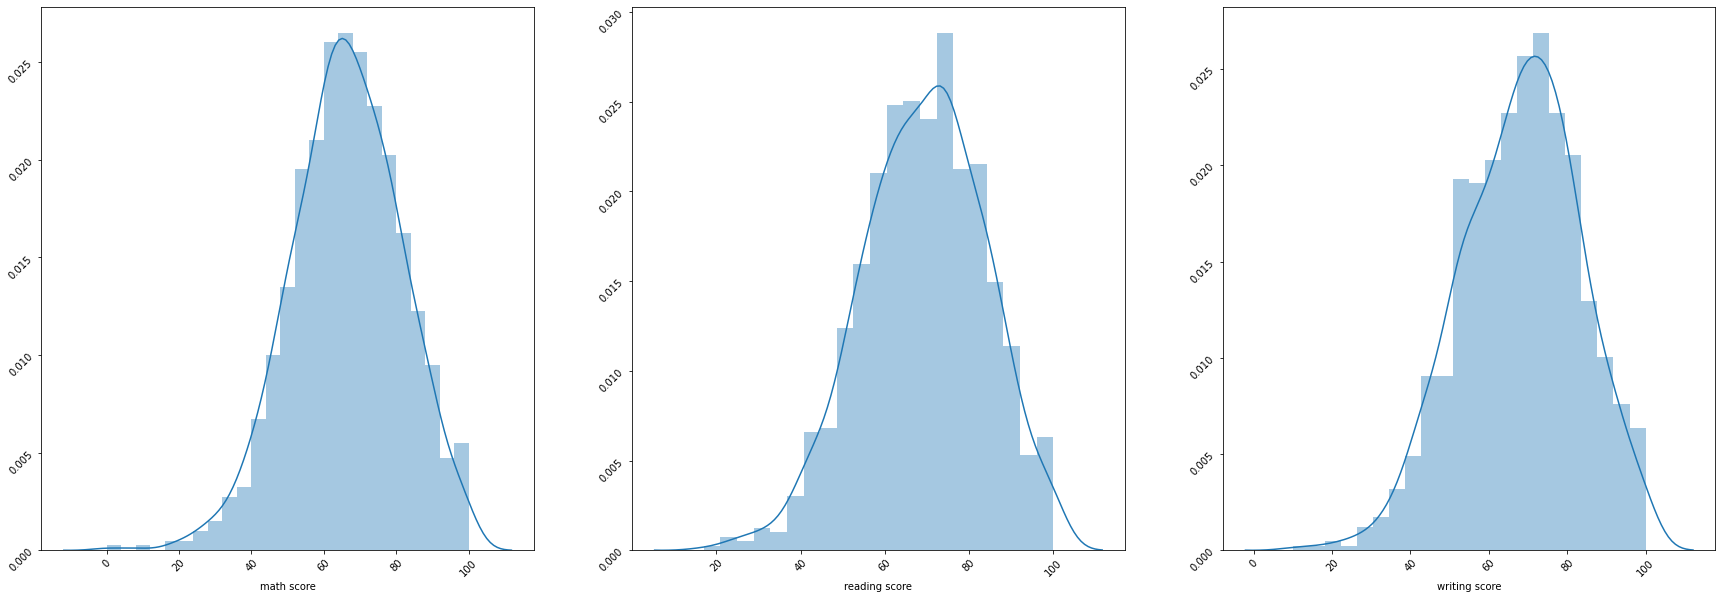

In [7]:
fig, (ax1, ax2 ,ax3) = plt.subplots(1,3,figsize=(30,10))
sns.distplot(df['math score'],ax=ax1)
sns.distplot(df['reading score'],ax=ax2)
sns.distplot(df['writing score'],ax=ax3)
ax1.tick_params(labelrotation=45)
ax2.tick_params(labelrotation=45)
ax3.tick_params(labelrotation=45)

****

# 3.  **Let's look into scores correllation with other features.**

# **- Parental level of education influence. **

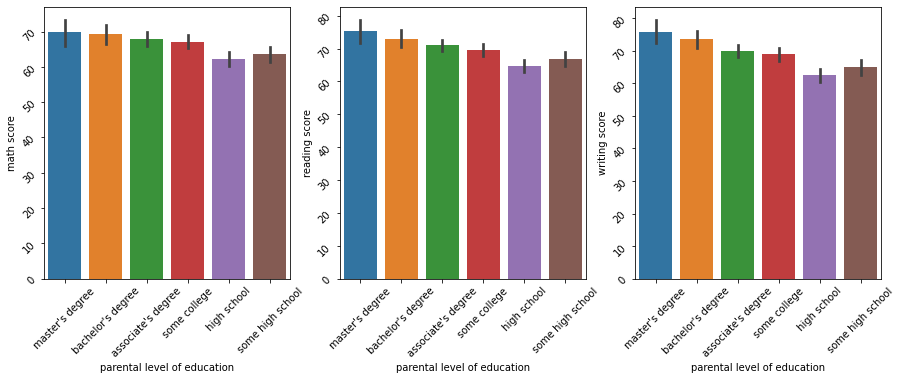

In [8]:
fig, (ax1, ax2 ,ax3) = plt.subplots(1,3,figsize=(15,5))
sns.barplot(df['parental level of education'],df['math score'],
            order=["master's degree","bachelor's degree","associate's degree","some college","high school","some high school"],ax=ax1)
sns.barplot(df['parental level of education'],df['reading score'],
            order=["master's degree","bachelor's degree","associate's degree","some college","high school","some high school"],ax=ax2)
sns.barplot(df['parental level of education'],df['writing score'],
            order=["master's degree","bachelor's degree","associate's degree","some college","high school","some high school"],ax=ax3)
ax1.tick_params(labelrotation=45)
ax2.tick_params(labelrotation=45)
ax3.tick_params(labelrotation=45)

**As we can see there's a trend of higher scores the higher the parents level of education is. Probably because of the differences in wages.**

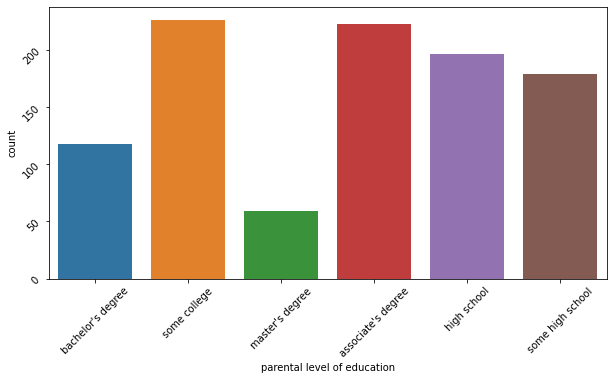

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(df['parental level of education'])
plt.tick_params(labelrotation=45)

**Most of the parents don't have a degree.**

# **- Test preparation course influence. **

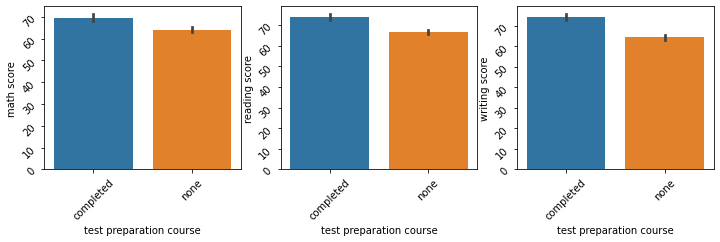

In [10]:
fig, (ax1, ax2 ,ax3) = plt.subplots(1,3,figsize=(12,3))
sns.barplot(df['test preparation course'],df['math score'],
            order=["completed","none"],ax=ax1)
sns.barplot(df['test preparation course'],df['reading score'],
            order=["completed","none"],ax=ax2)
sns.barplot(df['test preparation course'],df['writing score'],
            order=["completed","none"],ax=ax3)
ax1.tick_params(labelrotation=45)
ax2.tick_params(labelrotation=45)
ax3.tick_params(labelrotation=45)

**Obviously the students who completed a test preparation course got higher scores in exam.** 

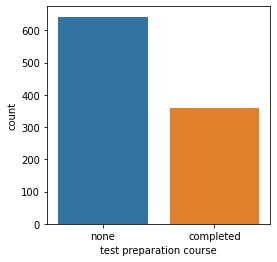

In [11]:
plt.figure(figsize=(4,4))
sns.countplot(df['test preparation course'])

**Most of the students didn't complete a test preparation course. **

# **- Lunch influence. **

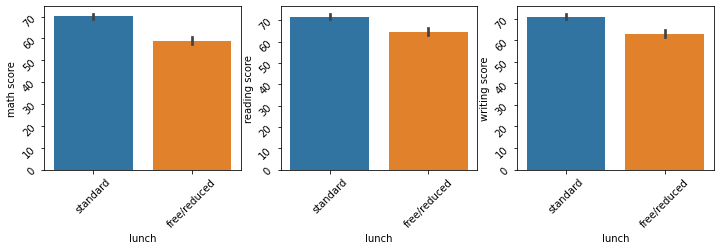

In [12]:
fig, (ax1, ax2 ,ax3) = plt.subplots(1,3,figsize=(12,3))
sns.barplot(df['lunch'],df['math score'],
            order=["standard","free/reduced"],ax=ax1)
sns.barplot(df['lunch'],df['reading score'],
            order=["standard","free/reduced"],ax=ax2)
sns.barplot(df['lunch'],df['writing score'],
            order=["standard","free/reduced"],ax=ax3)
ax1.tick_params(labelrotation=45)
ax2.tick_params(labelrotation=45)
ax3.tick_params(labelrotation=45)

**Lunch has a noticeable effect on students performance.**

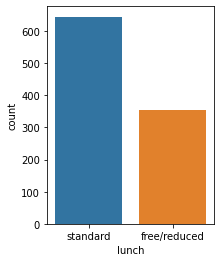

In [13]:
plt.figure(figsize=(3,4))
sns.countplot(df['lunch'])

**Most of the students had a standard lunch that day.**

# **- Race/Ethnicity influence. **

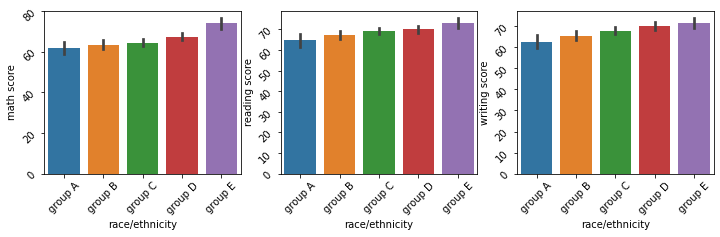

In [14]:
fig, (ax1, ax2 ,ax3) = plt.subplots(1,3,figsize=(12,3))
sns.barplot(df['race/ethnicity'],df['math score'],
            order=["group A","group B","group C","group D","group E"],ax=ax1)
sns.barplot(df['race/ethnicity'],df['reading score'],
            order=["group A","group B","group C","group D","group E"],ax=ax2)
sns.barplot(df['race/ethnicity'],df['writing score'],
            order=["group A","group B","group C","group D","group E"],ax=ax3)
ax1.tick_params(labelrotation=45)
ax2.tick_params(labelrotation=45)
ax3.tick_params(labelrotation=45)

**The difference in marks might be the result of the household income variation.  **

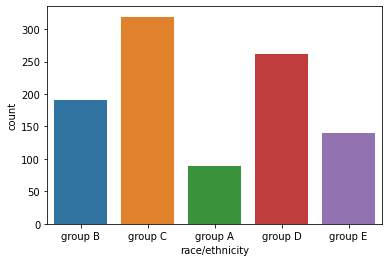

In [15]:
sns.countplot(df['race/ethnicity'])

**Most of the students belong to the C and D group.**

****

# 4. ** Preparing the data**

**-First, let's prepare the data by one hot encoding**

In [16]:
extra_df = pd.get_dummies(df[['gender','race/ethnicity','parental level of education','lunch','test preparation course']],drop_first=True)

In [17]:
df = df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis=1)

In [18]:
df = pd.concat([df,extra_df],axis=1)

In [19]:
df.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1


In [20]:
df['Passed math'] = df['math score'] >= 60
df['Passed reading'] = df['reading score'] >= 60
df['Passed writing'] = df['writing score'] >= 60

In [21]:
df = df.drop(['math score','reading score','writing score'],axis=1)

In [22]:
df.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,Passed math,Passed reading,Passed writing
0,0,1,0,0,0,1,0,0,0,0,1,1,True,True,True
1,0,0,1,0,0,0,0,0,1,0,1,0,True,True,True
2,0,1,0,0,0,0,0,1,0,0,1,1,True,True,True
3,1,0,0,0,0,0,0,0,0,0,0,1,False,False,False
4,1,0,1,0,0,0,0,0,1,0,1,1,True,True,True


**- There's no need to standardize the dataset because the values of features we are using for training are either 0 or 1.  **

****

# 5. ** Predicting the outcome of tests**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.utils import shuffle

In [24]:
df.iloc[:,-3:] = df.iloc[:,-3:].astype(int)

In [25]:
df = shuffle(df) 

In [26]:
X_train = df.iloc[:900,:-3]
y_train = df.iloc[:900,-3:]
X_test = df.iloc[900:,:-3]
y_test = df.iloc[900:,-3:]

In [27]:
knc = KNeighborsClassifier()

In [28]:
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
predictions = knc.predict(X_test)

**The classification_report builds a text report showing the main classification metrics**

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        65
           1       0.76      0.87      0.81        75
           2       0.75      0.85      0.80        68

   micro avg       0.75      0.86      0.80       208
   macro avg       0.75      0.86      0.80       208
weighted avg       0.75      0.86      0.80       208
 samples avg       0.69      0.65      0.65       208



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**As we can see we trained a model which was able to predict the outcome with over 80% accuracy. **